[Colab notebook link](https://colab.research.google.com/drive/1Ld3bW0ASDQEegpxRwoFmGiJziGcHS82U?usp=sharing)

#Exploration of Pytorch and Resources Used (Task 1)

My objective for this homework was to learn the Pytorch framework for a machine learning classification problem. Pytorch is an open source machine learning library used by companies such as Amazon and Salesforce for a variety of ML problems such as NLP. I reviewed a variety of datasets and problems before deciding that I wanted to do a multi-classification problem with a dataset with a noticeable number of features. Ultimately, I selected a dataset with 52913 instances, 7 features, and 5 possible labels. This dataset will be described in more depth in “Base Requirements”. 

##Learning Pytorch
https://pytorch.org/tutorials/beginner/basics/intro.html

https://pytorch.org/tutorials/recipes/recipes/defining_a_neural_network.html

https://pytorch.org/tutorials/beginner/introyt/trainingyt.html

Because this was my first time creating a solo project with Pytorch, I relied on the tutorials above as part of my research on how to implement a neural network. My goal was to understand nn.module, which Pytorch uses for the majority of its functions related to NN. Appropriate attribution to a specific tutorial is provided as needed in the code.


##Learning Pytorch Dataloader

https://pytorch.org/docs/stable/data.html

https://pythonguides.com/pytorch-dataloader/

https://androidkt.com/load-pandas-dataframe-using-dataset-and-dataloader-in-pytorch/

I initially had a lot of difficulty understanding the dataset functions of Pytorch due to picking large datasets that were difficult to process in a reasonable time with my initial level of knowledge. Eventually, I selected a dataset that I could preprocess via pandas and convert to a Pytorch dataset and pass to a DataLoader. This provided to be a much more efficient method that took seconds to set up each time and let me better understand how Dataset/Dataloader worked. A Dataset convert desired objects storing data (e.g. pandas dataframe, numpy array) it to a set of Pytorch tensors (usually an x and y) with additional functions defined to let it provide details such as Dataset size or being able to return desired elements of the dataset. This Dataset can be then taken by a Dataloader and used to provide arbitrary amounts of data (e.g. for batches, or providing the entire dataset to calculate length).


##Research and Review of Activation Functions, Backpropagation, Loss Functions 

https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

https://stats.stackexchange.com/questions/362461/is-it-better-to-avoid-relu-as-activation-function-if-input-data-has-plenty-of-ne

https://www.quora.com/What-are-the-advantages-of-using-Leaky-Rectified-Linear-Units-Leaky-ReLU-over-normal-ReLU-in-deep-learning

https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html

The above resources were used to investigate and review the concepts of ReLU activation function and related activation functions like Leaky ReLU and ELU that we would go on to try as part of Task 2 and 3 with modified hyperparameters. ReLU (Rectified Linear Unit) takes gradient values and calculates max(0,z), effectively returning 0 for non positive values and 1 for positive values. Normally, this solves the vanishing gradient problem, but for large amounts of negative values it is possible the problem will persist via “dead” ReLU neurons in the network. Leaky ReLU allows for fractional small negative inputs and ELU and a smoothing function alpha to allow for negative inputs.

https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

This article was used to determine the most appropriate loss function for our problem. We chose Cross Entropy Loss as it is well suited to handling mult-classification problems where each class can be denoted by an integer label.

https://medium.com/@mugeshk/backpropagation-algorithm-using-pytorch-ee1287888aca

An additional resource used to study how backpropagation were specifically implemented in Pytorch.



#Data Set and Base Requirements

Dataset used https://archive.ics.uci.edu/ml/datasets/Basketball+dataset

This time we will use accelerometer data to classify whether a basketball athlete is performing one of five actions in a basketball game: dribble, hold, pass, pickup, or shoot. We expect these classifications will be useful for sports analysts and coaches who are likely interested in whether their athletes are moving the correct way to perform the acting they intend (i.e. am athlete who intends to shoot should not be trying to pass!)

The dataset consists of actions with the following 7 features:


*   1:   Time - The time since the action has started, in seconds.

*   2,3,4:   X,Y,Z - Acceleration of the athlete performing the action, as measured by an accelerometer in m/s^2.

*   5:  R - Acceleration of the athlete as measured by a gyroscope in m/s^2.

*   6,7: Theta, Phi - Angle of acceleration as measured by a gyroscope in  degrees.

Additionally, "dribble, hold, pass, pickup, or shoot" will be assigned as the labels to this dataset, using numbers 0-4.

The data was split among text files and organized by athlete initial and action taken. This setup was leveraged to quickly create a pandas dataframe that properly represented our data as seen in "Loading Data and Peforming Exploratory Data Analysis".



In [ ]:
pip install torch torchvision torchaudio torchdata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 10.9 MB/s 
     |████████████████████████████████| 140 kB 4.5 MB/s 
     |████████████████████████████████| 127 kB 62.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
#import requirements
import numpy as np
import operator
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
#pytorch specific utils
import torch
from torch import nn
from torch.utils.data import DataLoader , random_split, Dataset
from torchtext import datasets
from torchtext.transforms import ToTensor
from torchtext.data import get_tokenizer

In [ ]:
RANDOM_STATE=233

#Loading Data and Performing Exploratory Data Analysis (Task 2)

1. Exploratory Data Analysis (Can include data cleaning, visualization etc.)

Additional comments on dataset, cleaning, and visualization have been provided where needed.

In [ ]:
#quick mv command for misplaced files
#mv  *.txt Athlete_D

In [ ]:
from os import listdir
from os.path import isfile, join

In [ ]:
test_dir = "Athlete_D"
ath_D_array = [f for f in listdir(test_dir) if isfile(join(test_dir, f))]
print(ath_D_array)

['D_pass2.txt', 'D_pickup5.txt', 'D_pickup3.txt', 'D_pass5.txt', 'D_shoot2.txt', 'D_hold3.txt', 'D_dribble3.txt', 'D_hold2.txt', 'D_pickup2.txt', 'D_pickup1.txt', 'D_pickup4.txt', 'D_shoot3.txt', 'D_pass1.txt', 'D_dribble2.txt', 'D_pass3.txt', 'D_pass4.txt', 'D_shoot4.txt', 'D_pass6.txt', 'D_dribble1.txt', 'D_shoot1.txt', 'D_shoot5.txt', 'D_hold1.txt']


In [ ]:
#Athletes were categorized by initial, so we sort them accordingly 
#into folders before starting processing
#File names are marked as INITIAL_ACTION(NUMBER).
#We will use the ACTION 
athlete_folders = ["Athlete_D","Athlete_Jc", "Athlete_L", "Athlete_X"]
actions = ["dribble","hold","pass","pickup","shoot"] #label will correspond to index number

In [ ]:
#test with reading one file
newcol= "Action"
df = pd.read_table("Athlete_D/D_dribble1.txt", delimiter=",", skiprows=3)
df[newcol]=0

In [ ]:
df

,Time (s),X (m/s2),Y (m/s2),Z (m/s2),R (m/s2),Theta (deg),Phi (deg),Action
0,0.000000,3.428497,9.112331,-2.047042,9.948847,101.873802,69.381287,0
1,0.009703,3.447650,9.285912,-2.331953,10.176072,103.247643,69.631172,0
2,0.019734,3.506308,9.212888,-2.244564,10.109875,102.827530,69.163811,0
3,0.029704,3.703830,8.972271,-1.990779,9.908744,101.590256,67.568748,0
4,0.039805,3.902549,8.799889,-1.545457,9.749685,99.120628,66.083809,0
...,...,...,...,...,...,...,...,...
984,9.879907,3.989937,8.725668,-0.760159,9.624694,94.529945,65.427071,0
985,9.889970,4.096479,8.585608,-0.766145,9.543624,94.604553,64.492638,0
986,9.900604,4.034230,8.754398,-0.822408,9.674236,94.876610,65.258652,0
987,9.910431,3.951630,9.159019,-1.513135,10.089231,98.625496,66.662369,0


In [ ]:
dfcols = ["Time (s)", "X (m/s2)", "Y (m/s2)", "Z (m/s2)", "R (m/s2)", "Theta (deg)", "Phi (deg)", "Action"]
all_df = pd.DataFrame(columns = dfcols)

In [ ]:
all_df

,Time (s),X (m/s2),Y (m/s2),Z (m/s2),R (m/s2),Theta (deg),Phi (deg),Action


In [ ]:
myframes = []
for foldername in athlete_folders:
  textfiles = [f for f in listdir(foldername) if isfile(join(foldername, f))]
  for textfile in textfiles:
    fullpath = foldername + "/" + textfile
    df_temp = pd.read_table(fullpath, delimiter=",", skiprows=3)
    if "dribble" in textfile:
        df_temp["Action"] = 0
    elif "hold" in textfile:
        df_temp["Action"] = 1
    elif "pass" in textfile:
        df_temp["Action"] = 2
    elif "pickup" in textfile:
        df_temp["Action"] = 3
    elif "shoot" in textfile:
        df_temp["Action"] = 4
    else:
        df_temp["Action"] = 5 #this label represents INVALID data.
    myframes.append(df_temp)

In [ ]:
len(myframes)

79

In [ ]:
all_df = pd.concat(myframes)

In [ ]:
#52913 rows × 8 columns
all_df

,Time (s),X (m/s2),Y (m/s2),Z (m/s2),R (m/s2),Theta (deg),Phi (deg),Action
0,0.000000,4.630386,8.900445,-3.051410,10.486634,106.916687,62.514652,2
1,0.010067,4.814740,8.911219,-2.783259,10.504193,105.364960,61.617607,2
2,0.020014,4.978743,8.688558,-2.178724,10.248207,102.274506,60.186302,2
3,0.030174,5.116409,8.512584,-1.629254,10.064601,99.316017,58.992424,2
4,0.040226,5.410896,8.554482,-1.308431,10.206319,97.365486,57.685757,2
...,...,...,...,...,...,...,...,...
569,5.689598,0.373774,0.997706,0.107629,1.070845,84.231529,69.462387,3
570,5.699913,0.378777,0.987700,0.113731,1.063935,83.863571,69.018478,3
571,5.709731,0.380851,0.961219,0.117758,1.040604,83.502335,68.385696,3
572,5.719699,0.373408,0.975009,0.070533,1.046446,86.135223,69.044220,3


In [ ]:
invalid_data = df.loc[df['Action'] == 5]

In [ ]:
#all of our data is valid actions!
#we have 52913 examples to work with
invalid_data

,Time (s),X (m/s2),Y (m/s2),Z (m/s2),R (m/s2),Theta (deg),Phi (deg),Action


In [ ]:
test= all_df.loc[all_df['Action'] == 3]

In [ ]:
test

,Time (s),X (m/s2),Y (m/s2),Z (m/s2),R (m/s2),Theta (deg),Phi (deg),Action
0,0.000000,1.897405,6.508637,7.580042,10.169540,41.809349,73.747482,3
1,0.009813,1.783680,6.707356,7.337031,10.099612,43.409012,75.108047,3
2,0.019684,1.868674,7.147889,7.380127,10.442726,45.030994,75.349052,3
3,0.029636,1.713051,6.873753,7.319075,10.185866,44.064941,76.006027,3
4,0.039645,1.448492,6.623559,7.020997,9.760330,43.999977,77.664307,3
...,...,...,...,...,...,...,...,...
569,5.689598,0.373774,0.997706,0.107629,1.070845,84.231529,69.462387,3
570,5.699913,0.378777,0.987700,0.113731,1.063935,83.863571,69.018478,3
571,5.709731,0.380851,0.961219,0.117758,1.040604,83.502335,68.385696,3
572,5.719699,0.373408,0.975009,0.070533,1.046446,86.135223,69.044220,3


In [ ]:
len(test)

15388

In [ ]:
#is data balanced?
numdata = []

for i in range (0,5):
  numdata.append(len(all_df.loc[all_df['Action'] == i]))

In [ ]:
numdata

[12823, 6369, 11363, 15388, 6970]

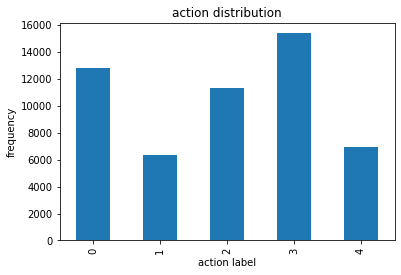

In [ ]:
df_nd = pd.DataFrame(numdata, columns=[''])
ax = df_nd.plot(kind='bar', title = "action distribution")
ax.set_xlabel("action label")
ax.set_ylabel("frequency")
ax.get_legend().remove()
plt.show()
#We seem to have less data on the "hold" and "shoot" actions.

In [ ]:
#Even if we only took 6369 examples from each dataset, 
#we would still be left with about 30,000 examples and plenty of data
#for train/val/test split
#so let's do that via random selection and rejoin the dataset.
balanced_combiner = []
for i in range (0,5):
  chunk_df = all_df.loc[all_df['Action'] == i]
  balanced_temp = chunk_df.sample(n=6369, random_state=RANDOM_STATE)
  balanced_combiner.append(balanced_temp)
balanced_all = pd.concat(balanced_combiner)
balanced_all = balanced_all.reset_index(drop=True)

In [ ]:
balanced_all

,Time (s),X (m/s2),Y (m/s2),Z (m/s2),R (m/s2),Theta (deg),Phi (deg),Action
0,9.286569,7.256825,8.359355,6.147113,12.662043,60.956364,49.038479,0
1,6.519716,4.259285,9.551667,0.842759,10.492192,85.392899,65.966927,0
2,1.930154,1.389834,9.433155,1.292869,9.622243,82.278236,81.618622,0
3,5.190177,5.582081,8.097190,2.985569,10.278022,73.113251,55.418201,0
4,1.839292,1.944092,9.502586,1.479617,9.811621,81.326569,78.437668,0
...,...,...,...,...,...,...,...,...
31840,0.330058,5.899313,8.258799,0.590171,10.166512,86.672081,54.461536,4
31841,2.910930,4.835090,8.590396,-0.167594,9.859061,90.974014,60.627087,4
31842,0.900034,0.041246,0.559623,0.199151,0.595433,70.460068,85.784775,4
31843,2.800076,2.767697,9.557653,-0.118513,9.951027,90.682388,73.850082,4


In [ ]:
#Looks balanced!
numdatanew = []
for i in range (0,5):
  numdatanew.append(len(balanced_all.loc[balanced_all['Action'] == i]))
print(numdatanew)

[6369, 6369, 6369, 6369, 6369]


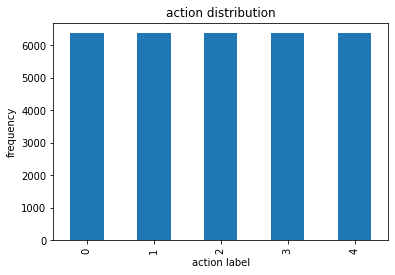

In [ ]:
df_nd = pd.DataFrame(numdatanew, columns=[''])
ax = df_nd.plot(kind='bar', title = "action distribution")
ax.set_xlabel("action label")
ax.set_ylabel("frequency")
ax.get_legend().remove()
plt.show()

In [ ]:
#Summary of all stats
#Some of the stats - especailly those involve degrees
#vary wildly, as indicated by std.
#We will normalize these following a train/val/test split.
balanced_all.describe()

,Time (s),X (m/s2),Y (m/s2),Z (m/s2),R (m/s2),Theta (deg),Phi (deg),Action
count,31845.000000,31845.000000,31845.000000,31845.000000,31845.000000,31845.000000,31845.000000,31845.000000
mean,3.681323,3.395105,6.532801,1.008307,8.653781,81.248700,75.564008,2.000000
std,2.925320,4.027623,4.081234,2.681248,4.516600,14.943924,51.551630,1.414236
min,0.000000,-39.195477,-15.529989,-33.500866,0.130054,9.837831,0.005464,0.000000
25%,1.529681,0.528750,4.237737,0.064643,8.814483,75.878181,57.309948,1.000000
50%,3.070108,3.300407,7.987057,0.766145,9.833926,81.005798,68.394600,2.000000
75%,5.009738,5.309142,9.099164,1.884237,10.001303,88.917610,77.554070,3.000000
max,20.670580,38.540661,39.221813,28.358122,54.321270,167.521606,359.945709,4.000000


Looking at data this way helps us get a better understanding of what the parameters reference as well. For example, "Time = 0" would be the representation of an athlete's velocty and angular momentum when starting an action. Actions last up to 20 seconds, meaning that an action's other features can vary depending on the time the action is recorded (for example, if an athlete jumped during an action, their vertical velocity would be positive at one point and negative at another.) 

In [ ]:
balanced_all.loc[balanced_all['Time (s)'] == 0]

,Time (s),X (m/s2),Y (m/s2),Z (m/s2),R (m/s2),Theta (deg),Phi (deg),Action
1097,0.0,1.829170,9.677363,0.592565,9.866528,86.556854,79.296494,0
2345,0.0,2.612074,9.417592,0.434548,9.782781,87.454102,74.498055,0
2478,0.0,3.479972,9.069236,-2.246958,9.970460,103.024139,69.007607,0
5426,0.0,1.865083,9.044097,2.370260,9.533749,75.604263,78.347748,0
6524,0.0,2.998738,9.139865,1.316811,9.708941,82.205025,71.835632,1
6531,0.0,2.920926,9.548077,0.484826,9.996631,87.220123,72.990196,1
7201,0.0,0.391346,0.826256,0.225021,0.941533,76.172829,64.656006,1
8266,0.0,0.209889,0.836140,0.076756,0.865491,84.912048,75.908676,1
8357,0.0,5.066131,8.058883,-1.243788,9.599910,97.444305,57.844917,1
9219,0.0,6.501455,8.044518,-0.800860,10.374226,94.427475,51.055393,1


#Setup Neural Network (Task 2)

##Train-Dev-Test Split
2. Perform a train-dev-test split.

In [ ]:
#shuffle dataset
train, test = train_test_split(balanced_all.sample(frac=1, random_state=RANDOM_STATE), test_size=0.2, random_state=RANDOM_STATE)#shuffle dataset
train, val = train_test_split(train.sample(frac=1, random_state=RANDOM_STATE), test_size=0.2, random_state=RANDOM_STATE)

In [ ]:
train = train.reset_index(drop=True)
train

,Time (s),X (m/s2),Y (m/s2),Z (m/s2),R (m/s2),Theta (deg),Phi (deg),Action
0,3.999938,0.255528,0.986968,-0.016474,1.019642,90.925743,75.484726,0
1,1.979857,9.759963,2.919729,0.678756,10.209917,86.188164,16.654747,4
2,4.110168,-4.408922,7.669825,0.389058,8.855291,87.481895,119.892014,0
3,2.298580,1.953669,9.520543,1.557428,9.842923,80.895927,78.403572,0
4,2.469975,3.408146,9.175778,1.728614,9.939742,79.984810,69.623566,1
...,...,...,...,...,...,...,...,...
20375,4.490175,5.809530,7.963115,0.034716,9.857131,89.798210,53.887192,1
20376,3.199741,2.154782,9.575610,1.076194,9.873884,83.742676,77.318085,4
20377,1.030245,-2.466028,8.526949,13.201628,15.908272,33.915710,106.130081,4
20378,3.340062,7.097611,8.425196,0.300472,11.020449,88.437637,49.888313,0


In [ ]:
train_x = train.loc[:, train.columns != "Action"]
train_x=(train_x-train_x.mean())/train_x.std() #normalize
train_x

,Time (s),X (m/s2),Y (m/s2),Z (m/s2),R (m/s2),Theta (deg),Phi (deg)
0,0.120478,-0.777307,-1.355379,-0.389368,-1.679786,0.655615,-0.001492
1,-0.574560,1.596702,-0.881912,-0.127130,0.353484,0.336485,-1.144295
2,0.158405,-1.942389,0.281717,-0.236403,0.053785,0.423633,0.861142
3,-0.464899,-0.353147,0.735087,0.204302,0.272290,-0.020007,0.055208
4,-0.405928,0.010151,0.650630,0.268873,0.293710,-0.081381,-0.115349
...,...,...,...,...,...,...,...
20375,0.289152,0.609967,0.353565,-0.370059,0.275433,0.579663,-0.421036
20376,-0.154841,-0.302913,0.748577,0.022782,0.279140,0.171754,0.034121
20377,-0.901289,-1.457095,0.491687,4.596450,1.614197,-3.184661,0.593809
20378,-0.106562,0.931702,0.466760,-0.269817,0.532807,0.488013,-0.498716


In [ ]:
train_y = train.loc[:, train.columns == "Action"]
train_y

,Action
0,0
1,4
2,0
3,0
4,1
...,...
20375,1
20376,4
20377,4
20378,0


In [ ]:
val = val.reset_index(drop=True)
val

,Time (s),X (m/s2),Y (m/s2),Z (m/s2),R (m/s2),Theta (deg),Phi (deg),Action
0,0.820280,0.383292,0.880803,0.301167,1.006691,72.592552,66.483147,1
1,2.790099,0.849942,10.966640,-0.349553,11.005080,91.820190,85.568298,4
2,0.768892,4.414908,8.609550,1.865083,9.853643,79.089317,62.851612,2
3,2.039904,7.857770,6.654684,1.871069,10.465671,79.701202,40.261002,4
4,1.449559,17.051504,-1.085770,-0.095768,17.086306,90.321144,356.356567,4
...,...,...,...,...,...,...,...,...
5091,2.050196,0.393420,0.879338,0.298238,1.008445,72.798058,65.896019,1
5092,2.425933,6.506243,7.214927,-1.222240,9.791845,97.170486,47.956635,4
5093,3.370726,0.241814,10.687716,0.835576,10.723057,85.530792,88.703880,0
5094,3.389042,0.022745,7.483078,0.629675,7.509558,85.190109,89.825851,2


In [ ]:
test  = test.reset_index(drop=True)
test

,Time (s),X (m/s2),Y (m/s2),Z (m/s2),R (m/s2),Theta (deg),Phi (deg),Action
0,1.760212,4.745308,-7.856573,1.751359,9.344032,79.197121,301.131653,4
1,2.176916,1.734599,8.254010,5.280412,9.950892,57.950817,78.131866,3
2,2.550121,8.334216,5.339070,0.667982,9.920233,86.139046,32.644459,2
3,0.470366,0.684742,7.862558,5.594052,9.673785,54.671097,85.022728,3
4,4.750331,0.360473,0.939742,0.540831,1.142609,61.749329,69.013863,2
...,...,...,...,...,...,...,...,...
6364,18.860218,4.795586,9.907207,-1.430536,11.099406,97.405106,64.170685,3
6365,5.160208,5.942409,7.369353,2.594118,9.815754,74.675766,51.118416,0
6366,1.499983,-14.744691,16.468517,10.061633,24.286919,65.525894,131.838913,4
6367,2.250166,4.752491,8.382100,2.236184,9.891728,76.934425,60.447594,2


In [ ]:
val_x = val.loc[:, val.columns != "Action"]
val_x=(val_x-val_x.mean())/val_x.std() #normalize
val_y = val.loc[:, val.columns == "Action"]
test_x = test.loc[:, test.columns != "Action"]
test_x=(test_x-test_x.mean())/test_x.std() #normalize
test_y = test.loc[:, test.columns == "Action"]

##Pytorch Dataset Preparation

In [ ]:
train_y.values

array([[0],
       [4],
       [0],
       ...,
       [4],
       [0],
       [0]])

In [ ]:
train_y.values.flatten()

array([0, 4, 0, ..., 4, 0, 0])

In [ ]:
class BasketballDatasetTrain(Dataset):
  def __init__(self):
    self.x_train=torch.tensor(train_x.values,dtype=torch.float32)
    self.y_train=torch.tensor(train_y.values.flatten(),dtype=torch.float32)
 
  def __len__(self):
    return len(self.y_train)
   
  def __getitem__(self,idx):
    return self.x_train[idx],self.y_train[idx]

class BasketballDatasetVal(Dataset):
  def __init__(self):
    self.x_val=torch.tensor(val_x.values,dtype=torch.float32)
    self.y_val=torch.tensor(val_y.values.flatten(),dtype=torch.float32)
 
  def __len__(self):
    return len(self.y_val)
   
  def __getitem__(self,idx):
    return self.x_val[idx],self.y_val[idx]

class BasketballDatasetTest(Dataset):
  def __init__(self):
    self.x_test=torch.tensor(test_x.values,dtype=torch.float32)
    self.y_test=torch.tensor(test_y.values.flatten(),dtype=torch.float32)
 
  def __len__(self):
    return len(self.y_test)
   
  def __getitem__(self,idx):
    return self.x_test[idx],self.y_test[idx]

In [ ]:
batch_size = 64

# Create data loaders.
train_data=BasketballDatasetTrain()
val_data=BasketballDatasetVal()
test_data=BasketballDatasetTest()
train_dataloader = DataLoader(train_data, batch_size=batch_size)
val_dataloader = DataLoader(val_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [ ]:
#print some dataloader values to make sure dataloader is 
#working as intended
#We want to make sure  X and y look something like
#torch.Size([64, 7]) torch.Size([64])
#as we want to pass properly sized 
#tensors of features and their labels respectively
#to the NN.
for i, (data, labels) in enumerate(train_dataloader):
  print(data.shape, labels.shape)
  print(data,labels)
  break;

torch.Size([64, 7]) torch.Size([64])
tensor([[ 1.2048e-01, -7.7731e-01, -1.3554e+00, -3.8937e-01, -1.6798e+00,
          6.5562e-01, -1.4925e-03],
        [-5.7456e-01,  1.5967e+00, -8.8191e-01, -1.2713e-01,  3.5348e-01,
          3.3649e-01, -1.1443e+00],
        [ 1.5840e-01, -1.9424e+00,  2.8172e-01, -2.3640e-01,  5.3785e-02,
          4.2363e-01,  8.6114e-01],
        [-4.6490e-01, -3.5315e-01,  7.3509e-01,  2.0430e-01,  2.7229e-01,
         -2.0007e-02,  5.5208e-02],
        [-4.0593e-01,  1.0151e-02,  6.5063e-01,  2.6887e-01,  2.9371e-01,
         -8.1381e-02, -1.1535e-01],
        [ 1.8204e+00,  8.4499e-01,  6.8611e-01, -9.6564e-01,  6.6358e-01,
          1.1081e+00, -4.1717e-01],
        [ 4.3017e-01, -5.8069e-01,  9.9256e-01, -2.0796e-01,  4.4710e-01,
          4.2461e-01,  1.7105e-01],
        [-4.6095e-01,  6.8861e-01,  3.1280e-01,  2.6842e-01,  3.2116e-01,
         -7.2513e-02, -4.6061e-01],
        [-5.4736e-01,  2.5174e+00, -6.2766e-01,  9.5522e-01,  1.2934e+00,
         

##Forward Propagation, Cost Function, Gradient Descent

##Hyperparameter Study 1: Choice of Activation Function

##1A: ReLU

In [ ]:
#check what device we're using
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")
torch.set_grad_enabled(True) 

Using cpu device


In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        #super(NeuralNetwork, self).__init__()
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 256), #input layer 
            nn.ReLU(), 
            nn.Linear(256, 256), #hidden layer 1
            nn.ReLU(),
            nn.Linear(256, 256), #hidden layer 2
            nn.ReLU(),
            nn.Linear(256, 5), #output layer
        )
    # "Every nn.Module subclass implements the operations 
    # on input data in the forward method."
    # We already preprocessed the input data
    # so we just return x
    def forward(self, x): 
        logits = self.linear_relu_stack(x) #we already preprocessed the data, so we just pass it into the NN here
        return logits

3. Implement forward propagation (clearly describe the activation functions and other
hyper-parameters you are using).

In [ ]:
#Make sure nn was implmented as intended
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=5, bias=True)
  )
)



4. Compute the final cost function.

5. Implement gradient descent (any variant of gradient descent depending upon your
data and project can be used) to train your model. In this step it is up to you as someone
in charge of their project to improvise using optimization algorithms (Adams, RMSProp
etc.) and/or regularization.

In [ ]:
loss_fn = nn.CrossEntropyLoss()
#Opted for regular SGD 
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2) 

Training/testing

In [ ]:
#Code snippet attribution:
#https://pytorch.org/tutorials/beginner/basics/intro.html
#was used as part of the research process
#Modifications were made so that data could be processed as longs,
#additional statistics could be reported, 
#and a separate validate process was created. 

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y.long()) #loss function requires longs

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #When all batches complete
        if batch % 100 == 0:
            #calculate loss, "correctness" (accuracy)
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            correct = 0
            with torch.no_grad():
                for X, y in dataloader:
                    X, y = X.to(device), y.to(device)
                    pred = model(X)
                    correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            correct /= size
            print(f"Train Error: Accuracy: {(100*correct):>0.1f}%")


#validation
def validate(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y.long()).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Val Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct

#test - only use when training/validation are over
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y.long()).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
#Measure validation, and stop the NN if learning has stopped
#increasing in validation
epochs = 100
bestval = 0
decval = 0
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    tempval = validate(val_dataloader, model, loss_fn)
    if(tempval < bestval):
      decval+=1 
      if(decval==3):
        print("Validation no longer rising. Done!")
        break
    else:
      bestval=tempval
print("Max number of epochs hit or validation stop reached. Done!")

Epoch 1
-------------------------------
loss: 1.610569  [    0/20380]
Train Error: Accuracy: 20.4%
loss: 1.592173  [ 6400/20380]
Train Error: Accuracy: 37.9%
loss: 1.528603  [12800/20380]
Train Error: Accuracy: 39.3%
loss: 1.374272  [19200/20380]
Train Error: Accuracy: 40.4%
Val Error: 
 Accuracy: 40.5%, Avg loss: 1.447697 

Epoch 2
-------------------------------
loss: 1.424915  [    0/20380]
Train Error: Accuracy: 40.3%
loss: 1.475593  [ 6400/20380]
Train Error: Accuracy: 42.8%
loss: 1.370492  [12800/20380]
Train Error: Accuracy: 47.3%
loss: 1.144742  [19200/20380]
Train Error: Accuracy: 47.5%
Val Error: 
 Accuracy: 48.2%, Avg loss: 1.291887 

Epoch 3
-------------------------------
loss: 1.259045  [    0/20380]
Train Error: Accuracy: 47.8%
loss: 1.345087  [ 6400/20380]
Train Error: Accuracy: 48.5%
loss: 1.261577  [12800/20380]
Train Error: Accuracy: 48.4%
loss: 1.007090  [19200/20380]
Train Error: Accuracy: 49.7%
Val Error: 
 Accuracy: 50.0%, Avg loss: 1.198367 

Epoch 4
-----------

##1B: LeakyReLU

In [ ]:
#check what device we're using
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")
torch.set_grad_enabled(True) 

Using cpu device


In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 256), #input layer 
            nn.LeakyReLU(),
            nn.Linear(256, 256), #hidden layer 1
            nn.LeakyReLU(),
            nn.Linear(256, 256), #hidden layer 2
            nn.LeakyReLU(),
            nn.Linear(256, 5), #output layer
        )
    # "Every nn.Module subclass implements the operations 
    # on input data in the forward method."
    # We already preprocessed the input data
    # so we just return x
    def forward(self, x): 
        logits = self.linear_relu_stack(x) #we already preprocessed the data, so we just pass it into the NN here
        return logits

3. Implement forward propagation (clearly describe the activation functions and other
hyper-parameters you are using).

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=256, out_features=5, bias=True)
  )
)



4. Compute the final cost function.

5. Implement gradient descent (any variant of gradient descent depending upon your
data and project can be used) to train your model. In this step it is up to you as someone
in charge of their project to improvise using optimization algorithms (Adams, RMSProp
etc.) and/or regularization.

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2) 

In [ ]:
#Code snippet attribution:
#https://pytorch.org/tutorials/beginner/basics/intro.html
#was used as part of the research process
#Modifications were made so that data could be processed as longs,
#additional statitics could be reported, 
#and a separate validate process was created. 
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y.long()) 

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            correct = 0
            with torch.no_grad():
                for X, y in dataloader:
                    X, y = X.to(device), y.to(device)
                    pred = model(X)
                    correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            correct /= size
            print(f"Train Error: Accuracy: {(100*correct):>0.1f}%")


def validate(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y.long()).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Val Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y.long()).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 100
bestval = 0
decval = 0
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    tempval = validate(val_dataloader, model, loss_fn)
    if(tempval < bestval):
      decval+=1 
      if(decval==3):
        print("Validation no longer rising. Done!")
        break
    else:
      bestval=tempval
print("Max number of epochs hit or validation stop reached. Done!")

Epoch 1
-------------------------------
loss: 1.612147  [    0/20380]
Train Error: Accuracy: 21.1%
loss: 1.590777  [ 6400/20380]
Train Error: Accuracy: 28.5%
loss: 1.525511  [12800/20380]
Train Error: Accuracy: 34.8%
loss: 1.365149  [19200/20380]
Train Error: Accuracy: 39.1%
Val Error: 
 Accuracy: 38.1%, Avg loss: 1.436867 

Epoch 2
-------------------------------
loss: 1.410685  [    0/20380]
Train Error: Accuracy: 37.3%
loss: 1.459715  [ 6400/20380]
Train Error: Accuracy: 39.9%
loss: 1.366254  [12800/20380]
Train Error: Accuracy: 46.7%
loss: 1.147103  [19200/20380]
Train Error: Accuracy: 48.6%
Val Error: 
 Accuracy: 48.9%, Avg loss: 1.282867 

Epoch 3
-------------------------------
loss: 1.239849  [    0/20380]
Train Error: Accuracy: 48.7%
loss: 1.325363  [ 6400/20380]
Train Error: Accuracy: 48.7%
loss: 1.251921  [12800/20380]
Train Error: Accuracy: 49.1%
loss: 1.008436  [19200/20380]
Train Error: Accuracy: 49.9%
Val Error: 
 Accuracy: 50.7%, Avg loss: 1.187492 

Epoch 4
-----------

##1C: ELU

In [ ]:
#check what device we're using
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")
torch.set_grad_enabled(True) 

Using cpu device


In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 256), #input layer 
            nn.ELU(), 
            nn.Linear(256, 256), #hidden layer 1
            nn.ELU(),
            nn.Linear(256, 256), #hidden layer 2
            nn.ELU(),
            nn.Linear(256, 5), #output layer
        )
    # "Every nn.Module subclass implements the operations 
    # on input data in the forward method."
    # We already preprocessed the input data
    # so we just return x
    def forward(self, x): 
        logits = self.linear_relu_stack(x) #we already preprocessed the data, so we just pass it into the NN here
        return logits

3. Implement forward propagation (clearly describe the activation functions and other
hyper-parameters you are using).

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=256, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ELU(alpha=1.0)
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): ELU(alpha=1.0)
    (6): Linear(in_features=256, out_features=5, bias=True)
  )
)



4. Compute the final cost function.

5. Implement gradient descent (any variant of gradient descent depending upon your
data and project can be used) to train your model. In this step it is up to you as someone
in charge of their project to improvise using optimization algorithms (Adams, RMSProp
etc.) and/or regularization.

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2) 

In [ ]:
#Code snippet attribution:
#https://pytorch.org/tutorials/beginner/basics/intro.html
#was used as part of the research process
#Modifications were made so that data could be processed as longs,
#additional statitics could be reported, 
#and a separate validate process was created.  
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y.long()) 

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            correct = 0
            with torch.no_grad():
                for X, y in dataloader:
                    X, y = X.to(device), y.to(device)
                    pred = model(X)
                    correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            correct /= size
            print(f"Train Error: Accuracy: {(100*correct):>0.1f}%")


def validate(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y.long()).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Val Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y.long()).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 100
bestval = 0
decval = 0
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    #TODO VALIDATE
    tempval = validate(val_dataloader, model, loss_fn)
    if(tempval < bestval):
      decval+=1 
      if(decval==3):
        print("Validation no longer rising. Done!")
        break
    else:
      bestval=tempval
print("Max number of epochs hit or validation stop reached. Done!")

Epoch 1
-------------------------------
loss: 1.611489  [    0/20380]
Train Error: Accuracy: 23.7%
loss: 1.447748  [ 6400/20380]
Train Error: Accuracy: 40.7%
loss: 1.359314  [12800/20380]
Train Error: Accuracy: 44.5%
loss: 1.101026  [19200/20380]
Train Error: Accuracy: 45.1%
Val Error: 
 Accuracy: 45.5%, Avg loss: 1.270604 

Epoch 2
-------------------------------
loss: 1.239544  [    0/20380]
Train Error: Accuracy: 45.3%
loss: 1.304550  [ 6400/20380]
Train Error: Accuracy: 45.5%
loss: 1.296463  [12800/20380]
Train Error: Accuracy: 46.0%
loss: 1.017027  [19200/20380]
Train Error: Accuracy: 46.0%
Val Error: 
 Accuracy: 45.1%, Avg loss: 1.221825 

Epoch 3
-------------------------------
loss: 1.200430  [    0/20380]
Train Error: Accuracy: 45.7%
loss: 1.256796  [ 6400/20380]
Train Error: Accuracy: 46.1%
loss: 1.259418  [12800/20380]
Train Error: Accuracy: 46.2%
loss: 0.971211  [19200/20380]
Train Error: Accuracy: 45.8%
Val Error: 
 Accuracy: 45.7%, Avg loss: 1.187727 

Epoch 4
-----------

##Hyperparameter Study 2: Number of Layers

##2A: 3 Hidden Layers

In [ ]:
#check what device we're using
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")
torch.set_grad_enabled(True) 

Using cpu device


In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 256), #input layer 
            nn.ELU(), # relu for simplicity?
            nn.Linear(256, 256), #hidden layer 1
            nn.ELU(),
            nn.Linear(256, 256), #hidden layer 2
            nn.ELU(),
            nn.Linear(256, 256),
            nn.ELU(),
            nn.Linear(256, 5), #output layer
        )
    # "Every nn.Module subclass implements the operations 
    # on input data in the forward method."
    # We already preprocessed the input data
    # so we just return x
    def forward(self, x): 
        logits = self.linear_relu_stack(x) #we already preprocessed the data, so we just pass it into the NN here
        return logits

3. Implement forward propagation (clearly describe the activation functions and other
hyper-parameters you are using).

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=256, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ELU(alpha=1.0)
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): ELU(alpha=1.0)
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): ELU(alpha=1.0)
    (8): Linear(in_features=256, out_features=5, bias=True)
  )
)



4. Compute the final cost function.

5. Implement gradient descent (any variant of gradient descent depending upon your
data and project can be used) to train your model. In this step it is up to you as someone
in charge of their project to improvise using optimization algorithms (Adams, RMSProp
etc.) and/or regularization.

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2) 

In [ ]:
#Code snippet attribution:
#https://pytorch.org/tutorials/beginner/basics/intro.html
#was used as part of the research process
#Modifications were made so that data could be processed as longs,
#additional statitics could be reported, 
#and a separate validate process was created. 

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y.long())

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            correct = 0
            with torch.no_grad():
                for X, y in dataloader:
                    X, y = X.to(device), y.to(device)
                    pred = model(X)
                    correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            correct /= size
            print(f"Train Error: Accuracy: {(100*correct):>0.1f}%")


def validate(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y.long()).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Val Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y.long()).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 100
bestval = 0
decval = 0
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    tempval = validate(val_dataloader, model, loss_fn)
    if(tempval < bestval):
      decval+=1 
      if(decval==3):
        print("Validation no longer rising. Done!")
        break
    else:
      bestval=tempval
print("Max number of epochs hit or validation stop reached. Done!")

Epoch 1
-------------------------------
loss: 1.620467  [    0/20380]
Train Error: Accuracy: 21.3%
loss: 1.505602  [ 6400/20380]
Train Error: Accuracy: 47.4%
loss: 1.401324  [12800/20380]
Train Error: Accuracy: 45.2%
loss: 1.161096  [19200/20380]
Train Error: Accuracy: 46.3%
Val Error: 
 Accuracy: 46.6%, Avg loss: 1.299278 

Epoch 2
-------------------------------
loss: 1.262424  [    0/20380]
Train Error: Accuracy: 46.5%
loss: 1.339059  [ 6400/20380]
Train Error: Accuracy: 45.9%
loss: 1.308021  [12800/20380]
Train Error: Accuracy: 46.0%
loss: 1.039704  [19200/20380]
Train Error: Accuracy: 46.5%
Val Error: 
 Accuracy: 46.3%, Avg loss: 1.235762 

Epoch 3
-------------------------------
loss: 1.201532  [    0/20380]
Train Error: Accuracy: 46.6%
loss: 1.285263  [ 6400/20380]
Train Error: Accuracy: 46.2%
loss: 1.276472  [12800/20380]
Train Error: Accuracy: 46.7%
loss: 0.984694  [19200/20380]
Train Error: Accuracy: 46.6%
Val Error: 
 Accuracy: 45.8%, Avg loss: 1.199696 

Epoch 4
-----------

##2B: 5 Hidden Layers

In [ ]:
#check what device we're using
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")
torch.set_grad_enabled(True) 

Using cpu device


In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 256), #input layer 
            nn.ELU(), # relu for simplicity?
            nn.Linear(256, 256), #hidden layer 1
            nn.ELU(),
            nn.Linear(256, 256), #hidden layer 2
            nn.ELU(),
            nn.Linear(256, 256),
            nn.ELU(),
            nn.Linear(256, 256),
            nn.ELU(),
            nn.Linear(256, 256),
            nn.ELU(),
            nn.Linear(256, 5), #output layer
        )
    # "Every nn.Module subclass implements the operations 
    # on input data in the forward method."
    # We already preprocessed the input data
    # so we just return x
    def forward(self, x): 
        logits = self.linear_relu_stack(x) #we already preprocessed the data, so we just pass it into the NN here
        return logits

3. Implement forward propagation (clearly describe the activation functions and other
hyper-parameters you are using).

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=256, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ELU(alpha=1.0)
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): ELU(alpha=1.0)
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): ELU(alpha=1.0)
    (8): Linear(in_features=256, out_features=256, bias=True)
    (9): ELU(alpha=1.0)
    (10): Linear(in_features=256, out_features=256, bias=True)
    (11): ELU(alpha=1.0)
    (12): Linear(in_features=256, out_features=5, bias=True)
  )
)



4. Compute the final cost function.

5. Implement gradient descent (any variant of gradient descent depending upon your
data and project can be used) to train your model. In this step it is up to you as someone
in charge of their project to improvise using optimization algorithms (Adams, RMSProp
etc.) and/or regularization.

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2) 

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        #print(pred.size())
        #print(y.size())
        #predtrans = torch.transpose(pred, 0, 1)
        #print(predtrans.size())
        #loss = loss_fn(predtrans, y)
        loss = loss_fn(pred, y.long()) #fix 1
        #loss.requires_grad = True #fix 2

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            correct = 0
            with torch.no_grad():
                for X, y in dataloader:
                    X, y = X.to(device), y.to(device)
                    pred = model(X)
                    correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            correct /= size
            print(f"Train Error: Accuracy: {(100*correct):>0.1f}%")


def validate(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y.long()).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Val Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y.long()).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 100
bestval = 0
decval = 0
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    #TODO VALIDATE
    tempval = validate(val_dataloader, model, loss_fn)
    if(tempval < bestval):
      decval+=1 
      if(decval==3):
        print("Validation no longer rising. Done!")
        break
    else:
      bestval=tempval
    #TODO ESSAY
    #TODO ACTIVATION JUSTIFICATION
    #TODO ALT
print("Max number of epochs hit or validation stop reached. Done!")

Epoch 1
-------------------------------
loss: 1.601836  [    0/20380]
Train Error: Accuracy: 17.5%
loss: 1.602398  [ 6400/20380]
Train Error: Accuracy: 36.3%
loss: 1.573842  [12800/20380]
Train Error: Accuracy: 40.7%
loss: 1.467060  [19200/20380]
Train Error: Accuracy: 40.9%
Val Error: 
 Accuracy: 39.8%, Avg loss: 1.492200 

Epoch 2
-------------------------------
loss: 1.473192  [    0/20380]
Train Error: Accuracy: 38.9%
loss: 1.479681  [ 6400/20380]
Train Error: Accuracy: 37.4%
loss: 1.411127  [12800/20380]
Train Error: Accuracy: 41.0%
loss: 1.186414  [19200/20380]
Train Error: Accuracy: 43.9%
Val Error: 
 Accuracy: 44.2%, Avg loss: 1.314579 

Epoch 3
-------------------------------
loss: 1.246724  [    0/20380]
Train Error: Accuracy: 43.6%
loss: 1.349205  [ 6400/20380]
Train Error: Accuracy: 44.3%
loss: 1.313642  [12800/20380]
Train Error: Accuracy: 46.5%
loss: 1.056104  [19200/20380]
Train Error: Accuracy: 46.6%
Val Error: 
 Accuracy: 46.8%, Avg loss: 1.236637 

Epoch 4
-----------

##Hyperparameter Study 3:Num Nodes Per Layer Size

##3A:  Hidden Layers have 128 Nodes

In [ ]:
#check what device we're using
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")
torch.set_grad_enabled(True) 

Using cpu device


In [ ]:
#try at 256 neurons double if there are issues
class NeuralNetwork(nn.Module):
    def __init__(self):
        #super(NeuralNetwork, self).__init__()
        super().__init__()
        self.flatten = nn.Flatten() #might be vestigial...remove if no impact
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 128), #input layer 
            nn.ELU(), # relu for simplicity?
            nn.Linear(128, 128), #hidden layer 1
            nn.ELU(),
            nn.Linear(128, 128), #hidden layer 2
            nn.ELU(),
            #nn.Softmax(dim=1), #softmax for ideal classification?
            nn.Linear(128, 5), #output layer
        )
    # "Every nn.Module subclass implements the operations 
    # on input data in the forward method."
    # We already preprocessed the input data
    # so we just return x
    def forward(self, x): 
        #x.requires_grad_(True) #not needed - should be already setup with this assumption
        #return x
        #x = self.flatten(x)
        logits = self.linear_relu_stack(x) #we already preprocessed the data, so we just pass it into the NN here
        return logits

3. Implement forward propagation (clearly describe the activation functions and other
hyper-parameters you are using).

In [ ]:
m = nn.Softmax(dim=1)
input = torch.randn(2, 3)
output = m(input)
output

tensor([[0.3494, 0.1873, 0.4633],
        [0.3742, 0.3069, 0.3189]])

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=128, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ELU(alpha=1.0)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ELU(alpha=1.0)
    (6): Linear(in_features=128, out_features=5, bias=True)
  )
)



4. Compute the final cost function.

5. Implement gradient descent (any variant of gradient descent depending upon your
data and project can be used) to train your model. In this step it is up to you as someone
in charge of their project to improvise using optimization algorithms (Adams, RMSProp
etc.) and/or regularization.

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2) 

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        #print(pred.size())
        #print(y.size())
        #predtrans = torch.transpose(pred, 0, 1)
        #print(predtrans.size())
        #loss = loss_fn(predtrans, y)
        loss = loss_fn(pred, y.long()) #fix 1
        #loss.requires_grad = True #fix 2

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            correct = 0
            with torch.no_grad():
                for X, y in dataloader:
                    X, y = X.to(device), y.to(device)
                    pred = model(X)
                    correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            correct /= size
            print(f"Train Error: Accuracy: {(100*correct):>0.1f}%")


def validate(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y.long()).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Val Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y.long()).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 100
bestval = 0
decval = 0
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    #TODO VALIDATE
    tempval = validate(val_dataloader, model, loss_fn)
    if(tempval < bestval):
      decval+=1 
      if(decval==3):
        print("Validation no longer rising. Done!")
        break
    else:
      bestval=tempval
    #TODO ESSAY
    #TODO ACTIVATION JUSTIFICATION
    #TODO ALT
print("Max number of epochs hit or validation stop reached. Done!")

Epoch 1
-------------------------------
loss: 1.631810  [    0/20380]
Train Error: Accuracy: 19.7%
loss: 1.527414  [ 6400/20380]
Train Error: Accuracy: 37.9%
loss: 1.444305  [12800/20380]
Train Error: Accuracy: 41.7%
loss: 1.206050  [19200/20380]
Train Error: Accuracy: 45.4%
Val Error: 
 Accuracy: 45.3%, Avg loss: 1.336324 

Epoch 2
-------------------------------
loss: 1.323048  [    0/20380]
Train Error: Accuracy: 45.1%
loss: 1.370135  [ 6400/20380]
Train Error: Accuracy: 44.7%
loss: 1.337392  [12800/20380]
Train Error: Accuracy: 46.3%
loss: 1.060523  [19200/20380]
Train Error: Accuracy: 46.3%
Val Error: 
 Accuracy: 46.6%, Avg loss: 1.256334 

Epoch 3
-------------------------------
loss: 1.230130  [    0/20380]
Train Error: Accuracy: 46.6%
loss: 1.298939  [ 6400/20380]
Train Error: Accuracy: 46.6%
loss: 1.291863  [12800/20380]
Train Error: Accuracy: 46.5%
loss: 1.003802  [19200/20380]
Train Error: Accuracy: 46.4%
Val Error: 
 Accuracy: 46.2%, Avg loss: 1.219719 

Epoch 4
-----------

##3B: Hidden Layers Have  have 512 Nodes

In [ ]:
#check what device we're using
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")
torch.set_grad_enabled(True) 

Using cpu device


In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        #super(NeuralNetwork, self).__init__()
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 512), #input layer 
            nn.ELU(), 
            nn.Linear(512, 512), #hidden layer 1
            nn.ELU(),
            nn.Linear(512, 512), #hidden layer 2
            nn.ELU(),
            nn.Linear(512, 5), #output layer
        )
    # "Every nn.Module subclass implements the operations 
    # on input data in the forward method."
    # We already preprocessed the input data
    # so we just return x
    def forward(self, x): 
        logits = self.linear_relu_stack(x) #we already preprocessed the data, so we just pass it into the NN here
        return logits

3. Implement forward propagation (clearly describe the activation functions and other
hyper-parameters you are using).

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=512, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ELU(alpha=1.0)
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): ELU(alpha=1.0)
    (6): Linear(in_features=512, out_features=5, bias=True)
  )
)



4. Compute the final cost function.

5. Implement gradient descent (any variant of gradient descent depending upon your
data and project can be used) to train your model. In this step it is up to you as someone
in charge of their project to improvise using optimization algorithms (Adams, RMSProp
etc.) and/or regularization.

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2) 

In [ ]:
#Code snippet attribution:
#https://pytorch.org/tutorials/beginner/basics/intro.html
#was used as part of the research process
#Modifications were made so that data could be processed as longs,
#additional statitics could be reported, 
#and a separate validate process was created. 
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y.long()) 

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            correct = 0
            with torch.no_grad():
                for X, y in dataloader:
                    X, y = X.to(device), y.to(device)
                    pred = model(X)
                    correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            correct /= size
            print(f"Train Error: Accuracy: {(100*correct):>0.1f}%")


def validate(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y.long()).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Val Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y.long()).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 100
bestval = 0
decval = 0
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    tempval = validate(val_dataloader, model, loss_fn)
    if(tempval < bestval):
      decval+=1 
      if(decval==3):
        print("Validation no longer rising. Done!")
        break
    else:
      bestval=tempval
print("Max number of epochs hit or validation stop reached. Done!")

Epoch 1
-------------------------------
loss: 1.613340  [    0/20380]
Train Error: Accuracy: 30.3%
loss: 1.395846  [ 6400/20380]
Train Error: Accuracy: 45.2%
loss: 1.324866  [12800/20380]
Train Error: Accuracy: 46.1%
loss: 1.052245  [19200/20380]
Train Error: Accuracy: 45.9%
Val Error: 
 Accuracy: 45.5%, Avg loss: 1.238783 

Epoch 2
-------------------------------
loss: 1.208584  [    0/20380]
Train Error: Accuracy: 46.0%
loss: 1.273260  [ 6400/20380]
Train Error: Accuracy: 46.3%
loss: 1.269467  [12800/20380]
Train Error: Accuracy: 46.3%
loss: 0.979881  [19200/20380]
Train Error: Accuracy: 45.9%
Val Error: 
 Accuracy: 46.0%, Avg loss: 1.190588 

Epoch 3
-------------------------------
loss: 1.175752  [    0/20380]
Train Error: Accuracy: 45.8%
loss: 1.221062  [ 6400/20380]
Train Error: Accuracy: 46.1%
loss: 1.223329  [12800/20380]
Train Error: Accuracy: 46.5%
loss: 0.934941  [19200/20380]
Train Error: Accuracy: 46.8%
Val Error: 
 Accuracy: 46.7%, Avg loss: 1.150913 

Epoch 4
-----------

##Final Configuration - ELU, 2 Layer, 256 Nodes

In [ ]:
#check what device we're using
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")
torch.set_grad_enabled(True) 

Using cpu device


In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        #super(NeuralNetwork, self).__init__()
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 256), #input layer 
            nn.ELU(), # relu for simplicity?
            nn.Linear(256, 256), #hidden layer 1
            nn.ELU(),
            nn.Linear(256, 256), #hidden layer 2
            nn.ELU(),
            nn.Linear(256, 5), #output layer
        )
    # "Every nn.Module subclass implements the operations 
    # on input data in the forward method."
    # We already preprocessed the input data
    # so we just return x
    def forward(self, x): 
        logits = self.linear_relu_stack(x) #we already preprocessed the data, so we just pass it into the NN here
        return logits

3. Implement forward propagation (clearly describe the activation functions and other
hyper-parameters you are using).

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=256, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ELU(alpha=1.0)
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): ELU(alpha=1.0)
    (6): Linear(in_features=256, out_features=5, bias=True)
  )
)



4. Compute the final cost function.

5. Implement gradient descent (any variant of gradient descent depending upon your
data and project can be used) to train your model. In this step it is up to you as someone
in charge of their project to improvise using optimization algorithms (Adams, RMSProp
etc.) and/or regularization.

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2) #from 1e-3

In [ ]:
#Code snippet attribution:
#https://pytorch.org/tutorials/beginner/basics/intro.html
#was used as part of the research process
#Modifications were made so that data could be processed as longs,
#additional statitics could be reported, 
#and a separate validate process was created. 
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y.long()) 


        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            correct = 0
            with torch.no_grad():
                for X, y in dataloader:
                    X, y = X.to(device), y.to(device)
                    pred = model(X)
                    correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            correct /= size
            print(f"Train Error: Accuracy: {(100*correct):>0.1f}%")


def validate(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y.long()).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Val Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y.long()).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 100
bestval = 0
decval = 0
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    #TODO VALIDATE
    tempval = validate(val_dataloader, model, loss_fn)
    if(tempval < bestval):
      decval+=1 
      if(decval==3):
        print("Validation no longer rising. Done!")
        break
    else:
      bestval=tempval
print("Max number of epochs hit or validation stop reached. Done!")

Epoch 1
-------------------------------
loss: 1.600311  [    0/20380]
Train Error: Accuracy: 24.5%
loss: 1.429459  [ 6400/20380]
Train Error: Accuracy: 42.3%
loss: 1.358910  [12800/20380]
Train Error: Accuracy: 45.8%
loss: 1.093532  [19200/20380]
Train Error: Accuracy: 45.4%
Val Error: 
 Accuracy: 45.4%, Avg loss: 1.266747 

Epoch 2
-------------------------------
loss: 1.230521  [    0/20380]
Train Error: Accuracy: 45.9%
loss: 1.301010  [ 6400/20380]
Train Error: Accuracy: 45.9%
loss: 1.300360  [12800/20380]
Train Error: Accuracy: 46.1%
loss: 1.010393  [19200/20380]
Train Error: Accuracy: 46.1%
Val Error: 
 Accuracy: 45.4%, Avg loss: 1.221017 

Epoch 3
-------------------------------
loss: 1.195560  [    0/20380]
Train Error: Accuracy: 46.4%
loss: 1.258553  [ 6400/20380]
Train Error: Accuracy: 46.5%
loss: 1.267096  [12800/20380]
Train Error: Accuracy: 46.5%
loss: 0.966060  [19200/20380]
Train Error: Accuracy: 46.2%
Val Error: 
 Accuracy: 45.8%, Avg loss: 1.188846 

Epoch 4
-----------

##Test Set Presentation
6. Present the results using the test set.

In [ ]:
test(test_dataloader, model, loss_fn)

Test Error: 
 Accuracy: 81.7%, Avg loss: 0.487211 



#Using a Baseline Model - Descision Tree (Task 4)

We'll use a descision tree with a limited capacity to split branches and observe the results.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import time
from sklearn.ensemble import AdaBoostClassifier
import math
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from numpy import mean
from numpy import std

In [ ]:
#try limited max_depth
clf = tree.DecisionTreeClassifier(max_depth=5, random_state=86)
start = time.time()
clf = clf.fit(train_x.values, train_y.values)
end = time.time()
print("Time elapsed for Descision Tree fit: " + str(end - start))

Time elapsed for Descision Tree fit: 0.0995035171508789


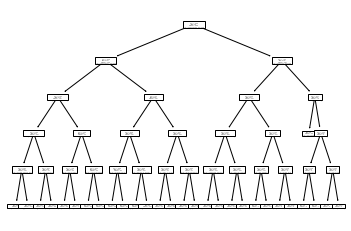

In [ ]:
tree.plot_tree(clf)
#plt.show to prevent excess chunks of text code
plt.show()

In [ ]:
print(clf.tree_.max_depth)

5


In [ ]:
y_DesTree_train =clf.predict(train_x.values)
y_DesTree_train = y_DesTree_train.reshape((y_DesTree_train.shape[0], 1))

In [ ]:
acc_s = str(accuracy_score(train_y.values, y_DesTree_train))

print("Train Accuracy: " + acc_s )

Train Accuracy: 0.6501472031403337


In [ ]:
#We can confirm that the initial descision tree overfit the train/test set this way
y_DesTree_test =clf.predict(test_x.values)
y_DesTree_test = y_DesTree_test.reshape((y_DesTree_test.shape[0], 1))

In [ ]:
acc_s = str(accuracy_score(test_y.values, y_DesTree_test))
print("Test Accuracy: " + acc_s )

Test Accuracy: 0.6435861202700581


Closing Thoughts (Task 3 and Task 4)


Our Neural Network peformed better than our decision tree in solving the proposed problem. This is likely because our dataset has complex enough features that a descision tree that has been restricted to be general enough to not overfit on the dataset cannot learn it as well as a neural network that is able to more carefully lean the nonlinearity features of the problem without overfitting.

Based on our accuracy statistics, using 256 nodes, ELU, and 2 layers was the best configuration.